In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)
INPUT_SHAPE = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
EPOCHS = 5

In [4]:
image_dataset = keras.preprocessing.image_dataset_from_directory(
    "Datasets", 
    label_mode="binary",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

Found 3000 files belonging to 2 classes.


In [5]:
CLASS = image_dataset.class_names
CLASS

['no', 'yes']

In [33]:
for image, label in image_dataset.take(1):
    print(label[1][0].numpy())

1.0


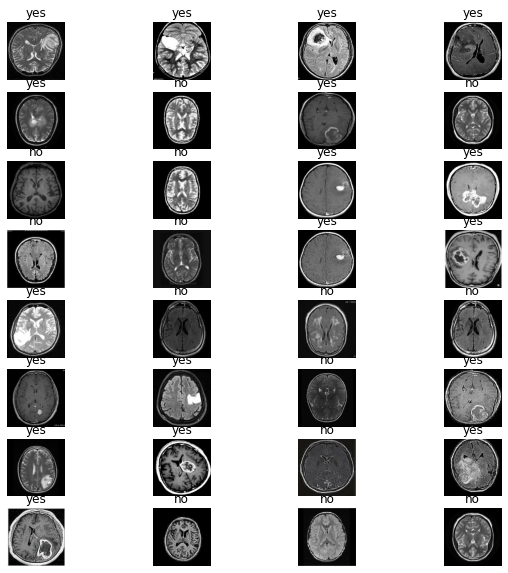

In [36]:
plt.figure(figsize=(10, 10))
for image, label in image_dataset.take(1):
    for a in range(32):
        plt.subplot(8, 4, a+1)
        plt.imshow(image[a].numpy().astype("uint8"))
        plt.title(CLASS[int(label[a][0].numpy())])
        plt.axis("off")
        a+=1
    

In [42]:
len(further_ds)*0.5

9.5

In [39]:
train_ds = image_dataset.take(75)

In [40]:
further_ds = image_dataset.skip(75)

In [43]:
test_ds = further_ds.take(9)
val_ds = further_ds.skip(9)

In [45]:
len(train_ds), len(test_ds), len(val_ds)

(75, 9, 10)

# Convolutional Neural Network

### Resizing and Rescaling

In [47]:
resize_and_rescale = keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    keras.layers.experimental.preprocessing.Rescaling(1./255)   
])



In [48]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
])

### Model Creation

In [50]:
model = keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(64, (3, 3), input_shape=INPUT_SHAPE, activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [52]:
model.compile(
    loss = "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [55]:
model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, batch_size=BATCH_SIZE)

Epoch 1/5
75/75 [==============================] - 178s 2s/step - loss: 0.1293 - accuracy: 0.9554 - val_loss: 0.0873 - val_accuracy: 0.9647
Epoch 2/5
75/75 [==============================] - 179s 2s/step - loss: 0.0951 - accuracy: 0.9737 - val_loss: 0.0917 - val_accuracy: 0.9712
Epoch 3/5
75/75 [==============================] - 181s 2s/step - loss: 0.0679 - accuracy: 0.9796 - val_loss: 0.0717 - val_accuracy: 0.9840
Epoch 4/5
75/75 [==============================] - 181s 2s/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0509 - val_accuracy: 0.9808
Epoch 5/5
75/75 [==============================] - 180s 2s/step - loss: 0.0537 - accuracy: 0.9821 - val_loss: 0.0198 - val_accuracy: 0.9904


In [56]:
score = model.evaluate(test_ds)

9/9 [==============================] - 7s 507ms/step - loss: 0.0445 - accuracy: 0.9861


### Saving Model

In [61]:
model.save("saved_model/model1")

INFO:tensorflow:Assets written to: saved_model/model1\assets
